In [2]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# %cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/


/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
# !pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha

 # EXTRACTING THE DATASET


In [ ]:
import tarfile

# Define path
file_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1.tar.gz'
extract_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted'

# Extract .tar.gz
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

print("Extraction completed.")


Extraction completed.



# VISUALIZING AND UNDERSTANDING THE DATASET


In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Path to your .tif image
# image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_102/ROIs2017_winter_s1_102_p100.tif'

# # Open and display the image
# img = Image.open(image_path)
# plt.figure(figsize=(8, 8))
# plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
# plt.axis('off')
# plt.title("TIF Image")
# plt.show()


In [ ]:
# !pip install rasterio


Bands: 13, Shape: 256x256


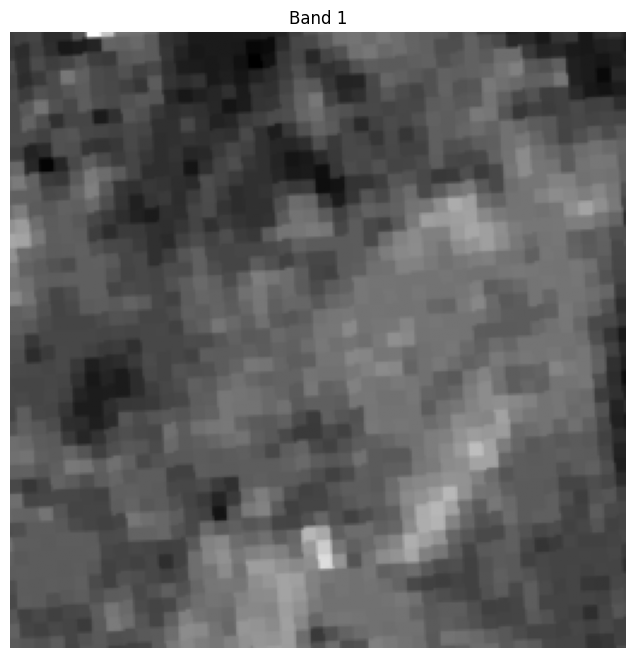

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Path to the .tif file
image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p109.tif'

# Open and read
with rasterio.open(image_path) as src:
    print(f"Bands: {src.count}, Shape: {src.width}x{src.height}")
    band1 = src.read(1)  # Read the first band

# Visualize Band 1
plt.figure(figsize=(8, 8))
plt.imshow(band1, cmap='gray')
plt.axis('off')
plt.title('Band 1')
plt.show()


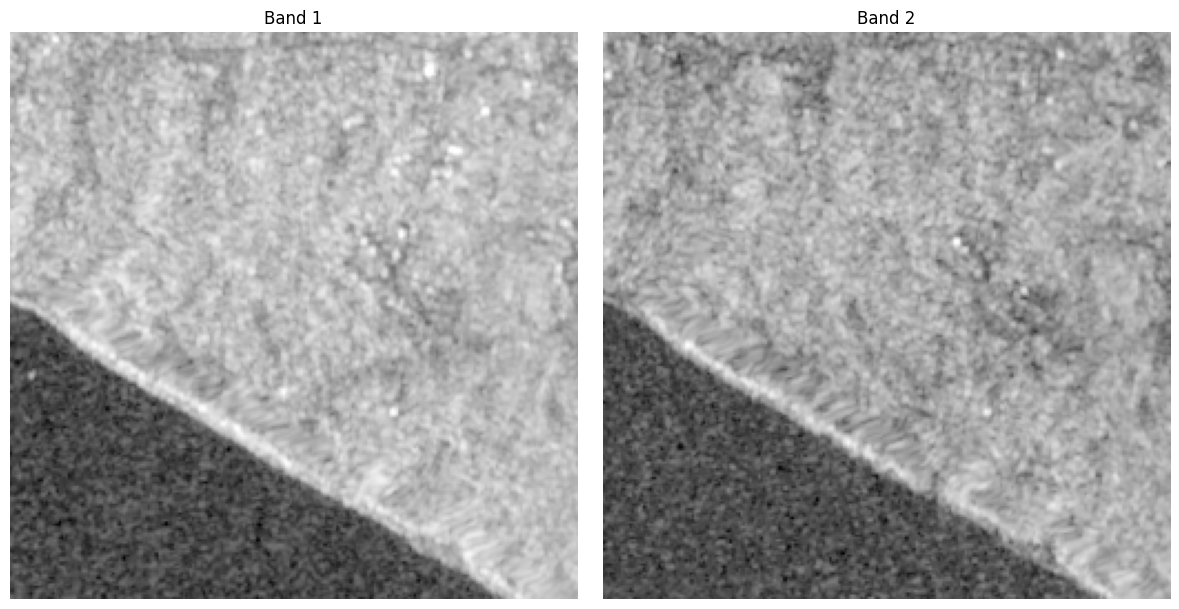

In [ ]:
import rasterio
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_104/ROIs2017_winter_s1_104_p105.tif'

with rasterio.open(image_path) as src:
    band1 = src.read(1)
    band2 = src.read(2)

# Plotting both bands
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(band1, cmap='gray')
axs[0].set_title("Band 1")
axs[0].axis('off')

axs[1].imshow(band2, cmap='gray')
axs[1].set_title("Band 2")
axs[1].axis('off')

plt.tight_layout()
plt.show()


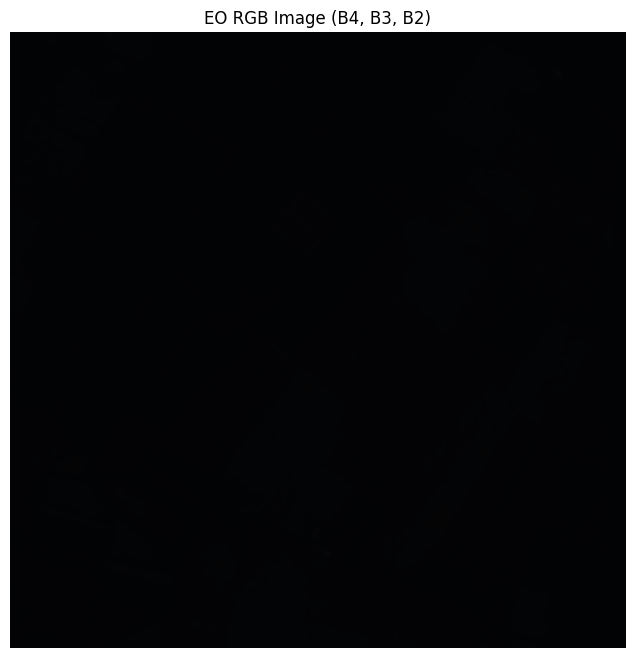

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
eo_image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p109.tif'

def normalize(image):
    image = image.astype(np.float32)
    image = image / 32767.5 - 1  # [-1, 1] normalization for float32 data
    return np.clip(image, -1, 1)

def denormalize(image):
    return np.clip((image + 1) / 2, 0, 1)  # bring back to [0, 1] for visualization

# Load and normalize RGB bands
with rasterio.open(eo_image_path) as src:
    red = normalize(src.read(4))   # B4
    green = normalize(src.read(3)) # B3
    blue = normalize(src.read(2))  # B2

# Stack and denormalize for display
rgb = np.stack([red, green, blue], axis=-1)
rgb = denormalize(rgb)

# Display the RGB image
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("EO RGB Image (B4, B3, B2)")
plt.axis('off')
plt.show()


In [ ]:
import rasterio
import numpy as np

eo_image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p100.tif'

with rasterio.open(eo_image_path) as src:
    red_raw = src.read(4)   # B4 - Red
    green_raw = src.read(3) # B3 - Green
    blue_raw = src.read(2)  # B2 - Blue

# Check min/max
print("Red:", np.min(red_raw), np.max(red_raw))
print("Green:", np.min(green_raw), np.max(green_raw))
print("Blue:", np.min(blue_raw), np.max(blue_raw))


Red: 499 2835
Green: 759 2649
Blue: 1220 2937


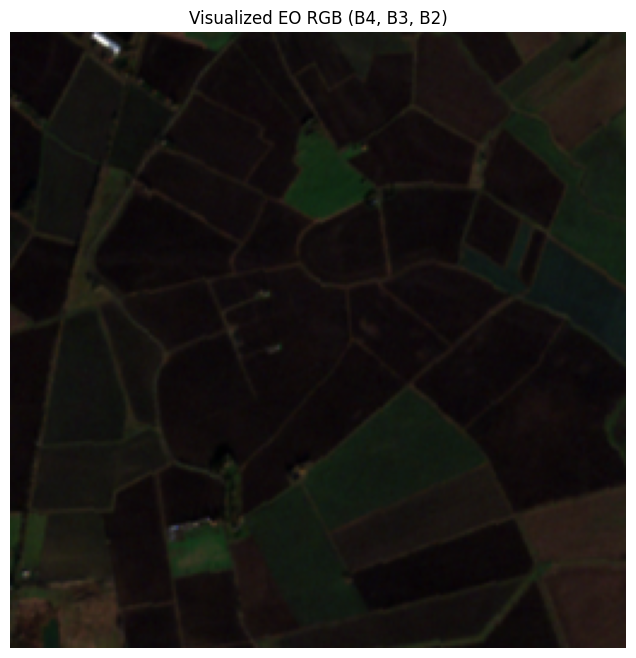

In [ ]:
import matplotlib.pyplot as plt

def normalize_visual(image):
    image = image.astype(np.float32)
    image -= image.min()
    image /= (image.max() + 1e-6)
    return np.clip(image, 0, 1)

# Normalize for visualization
r_vis = normalize_visual(red_raw)
g_vis = normalize_visual(green_raw)
b_vis = normalize_visual(blue_raw)

rgb_vis = np.stack([r_vis, g_vis, b_vis], axis=-1)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(rgb_vis)
plt.title("Visualized EO RGB (B4, B3, B2)")
plt.axis('off')
plt.show()


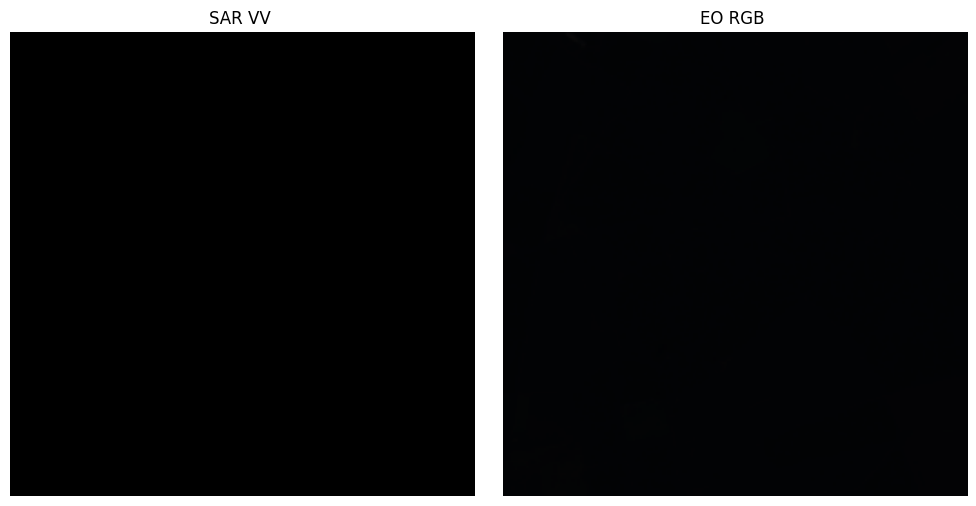

In [ ]:
import matplotlib.pyplot as plt

sar_file = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_102/ROIs2017_winter_s1_102_p100.tif"
eo_file = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p100.tif"
with rasterio.open(sar_file) as src:
        vv = normalize(src.read(1))
        vh = normalize(src.read(2))
        sar = np.stack([vv, vh], axis=-1)

with rasterio.open(eo_file) as src:
        r = normalize(src.read(4))
        g = normalize(src.read(3))
        b = normalize(src.read(2))
        eo = np.stack([r, g, b], axis=-1)

    # Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show SAR image: just show VV channel as grayscale for now
axs[0].imshow(vv, cmap='gray')
axs[0].set_title(f"SAR VV ")
axs[0].axis('off')

    # Show EO image as RGB
axs[1].imshow(to_uint8(eo))
axs[1].set_title(f"EO RGB ")
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def to_uint8(x):
    return ((x + 1) * 127.5).astype(np.uint8)


# ANALYSING MIN MAX VALUES

finding the best parameters to normalize the dataset in the range of [-1 to 1]

In [ ]:
import rasterio
import numpy as np
from pathlib import Path

# Set your EO or SAR folder path
folder = Path("/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102")  # or s2_8 etc.

# List first 3 .tif images
tif_files = list(folder.glob("*.tif"))[:3]

for tif in tif_files:
    print(f"\nReading {tif.name}")
    with rasterio.open(tif) as src:
        img = src.read(1)  # read first band
        print(f"  Shape      : {img.shape}")
        print(f"  Dtype      : {img.dtype}")
        print(f"  Min value  : {img.min()}")
        print(f"  Max value  : {img.max()}")



Reading ROIs2017_winter_s2_102_p132.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1723
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p121.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1744
  Max value  : 1939

Reading ROIs2017_winter_s2_102_p108.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1721
  Max value  : 1901


In [ ]:
import os
import numpy as np
import rasterio

folder = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102"  # Replace with your folder path

global_min = float('inf')
global_max = float('-inf')

for filename in os.listdir(folder):
    if filename.endswith(".tif"):
        path = os.path.join(folder, filename)
        try:
            with rasterio.open(path) as src:
                img = src.read(1)  # Read the first band
                img_min = img.min()
                img_max = img.max()
                dtype = img.dtype

                print(f"Reading {filename}")
                print(f"  Shape      : {img.shape}")
                print(f"  Dtype      : {dtype}")
                print(f"  Min value  : {img_min}")
                print(f"  Max value  : {img_max}\n")

                global_min = min(global_min, img_min)
                global_max = max(global_max, img_max)

        except Exception as e:
            print(f"Error reading {filename}: {e}")

print("=" * 40)
print(f"GLOBAL MIN VALUE ACROSS ALL IMAGES : {global_min}")
print(f"GLOBAL MAX VALUE ACROSS ALL IMAGES : {global_max}")


Reading ROIs2017_winter_s2_102_p132.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1723
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p121.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1744
  Max value  : 1939

Reading ROIs2017_winter_s2_102_p108.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1721
  Max value  : 1901

Reading ROIs2017_winter_s2_102_p131.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1722
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p118.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1749
  Max value  : 2014

Reading ROIs2017_winter_s2_102_p113.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1714
  Max value  : 2551

Reading ROIs2017_winter_s2_102_p117.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1747
  Max value  : 1995

Reading ROIs2017_winter_s2_102_p130.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min val

In [ ]:
import os
import rasterio
import numpy as np

base_dir = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter"
global_min = float('inf')
global_max = float('-inf')
min_vals = []
max_vals = []
file_count = 0
skipped = 0

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.tif'):
            path = os.path.join(root, file)
            try:
                with rasterio.open(path) as src:
                    img = src.read(1)  # Read the first band
                    img_min = img.min()
                    img_max = img.max()
                    dtype = img.dtype

                    print(f"Reading {file}")
                    print(f"  Path       : {path}")
                    print(f"  Shape      : {img.shape}")
                    print(f"  Dtype      : {dtype}")
                    print(f"  Min value  : {img_min}")
                    print(f"  Max value  : {img_max}\n")

                    global_min = min(global_min, img_min)
                    global_max = max(global_max, img_max)
                    min_vals.append(img_min)
                    max_vals.append(img_max)
                    file_count += 1
            except Exception as e:
                print(f"Error reading {file}: {e}")
                skipped += 1

print("======== Summary ========")
print(f"Files processed   : {file_count}")
print(f"Files skipped     : {skipped}")
print(f"Global min        : {global_min}")
print(f"Global max        : {global_max}")
print(f"Mean of min values: {np.mean(min_vals):.2f}")
print(f"Mean of max values: {np.mean(max_vals):.2f}")


Streaming output truncated to the last 5000 lines.
  Max value  : -0.7029467225074768

Reading ROIs2017_winter_s1_140_p821.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p821.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -22.249422073364258
  Max value  : 0.0

Reading ROIs2017_winter_s1_140_p94.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p94.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -26.55192756652832
  Max value  : -0.37110570073127747

Reading ROIs2017_winter_s1_140_p830.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p830.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -23.982553482055664
  Max value  : 0.0

Reading ROIs2017_winter_s1_140_p95.tif
  Path       : /content/drive

In [ ]:
import os

# Path to the 'ROIs2017_winter' directory
base_path = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter"

# List all subdirectories (folders like s1_102, s1_103, etc.)
subdirs = [name for name in os.listdir(base_path)
           if os.path.isdir(os.path.join(base_path, name)) and name.startswith("s1_")]

# Sort the folders (optional)
subdirs.sort()

# Print them
print(f"Found {len(subdirs)} subdirectories:")
for subdir in subdirs:
    print(subdir)


Found 46 subdirectories:
s1_102
s1_103
s1_104
s1_107
s1_108
s1_109
s1_112
s1_115
s1_116
s1_117
s1_118
s1_119
s1_121
s1_123
s1_126
s1_130
s1_132
s1_135
s1_138
s1_140
s1_144
s1_146
s1_21
s1_22
s1_25
s1_27
s1_29
s1_32
s1_39
s1_42
s1_47
s1_49
s1_55
s1_59
s1_61
s1_62
s1_63
s1_64
s1_68
s1_69
s1_75
s1_77
s1_8
s1_81
s1_84
s1_94


In [ ]:
import os
import numpy as np
import rasterio
from tqdm import tqdm

def get_multiband_stats(folder, bands=(1, 2)):
    stats = {b: {"mins": [], "maxs": []} for b in bands}

    for filename in tqdm(os.listdir(folder)):
        if filename.endswith(".tif"):
            path = os.path.join(folder, filename)
            with rasterio.open(path) as src:
                for b in bands:
                    if b > src.count:
                        continue
                    band = src.read(b)
                    band = band[~np.isnan(band)]
                    if band.size == 0:
                        continue
                    stats[b]["mins"].append(np.min(band))
                    stats[b]["maxs"].append(np.max(band))

    results = {}
    for b in bands:
        mins = np.array(stats[b]["mins"])
        maxs = np.array(stats[b]["maxs"])
        results[f"band_{b}"] = {
            "min": float(mins.min()) if len(mins) else None,
            "max": float(maxs.max()) if len(maxs) else None,
            "mean_min": float(mins.mean()) if len(mins) else None,
            "mean_max": float(maxs.mean()) if len(maxs) else None,
            "std_min": float(mins.std()) if len(mins) else None,
            "std_max": float(maxs.std()) if len(maxs) else None,
        }

    return results

sar_dir = "/content/drive/MyDrive/cyclegans/train/sar"
sar_stats = get_multiband_stats(sar_dir, bands=(1, 2))

print("SAR Band-wise Stats:")
for band, values in sar_stats.items():
    print(f"{band}: {values}")


100%|██████████| 1978/1978 [04:38<00:00,  7.10it/s]

SAR Band-wise Stats:
band_1: {'min': -40.55609130859375, 'max': 1.3891412019729614, 'mean_min': -24.378034591674805, 'mean_max': -1.4575380086898804, 'std_min': 3.6948940753936768, 'std_max': 3.1929357051849365}
band_2: {'min': -45.29977798461914, 'max': 5.602123447209437e-15, 'mean_min': -32.00514602661133, 'mean_max': -5.52532958984375, 'std_min': 3.2926535606384277, 'std_max': 5.222895622253418}


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
import numpy as np

In [ ]:
def get_multiband_stats_safe(directory, bands=(1, 2, 3,4,5,6,7,8,9,10,11,12,13)):
    stats = {b: [] for b in bands}
    errors = []

    for filename in tqdm(sorted(os.listdir(directory))):
        if not filename.endswith(".tif"):
            continue
        path = os.path.join(directory, filename)
        try:
            with rasterio.open(path) as src:
                for b in bands:
                    band_data = src.read(b).astype(np.float32)
                    stats[b].append({
                        "min": band_data.min(),
                        "max": band_data.max(),
                        "mean": band_data.mean(),
                        "std": band_data.std()
                    })
        except Exception as e:
            errors.append((filename, str(e)))

    # Combine stats
    final_stats = {}
    for b in bands:
        min_vals = [s["min"] for s in stats[b]]
        max_vals = [s["max"] for s in stats[b]]
        mean_vals = [s["mean"] for s in stats[b]]
        std_vals = [s["std"] for s in stats[b]]
        final_stats[b] = {
            "min": np.min(min_vals),
            "max": np.max(max_vals),
            "mean": np.mean(mean_vals),
            "std": np.mean(std_vals)
        }

    return final_stats, errors

eo_dir = "/content/drive/MyDrive/cyclegans/train/eo"
eo_stats, eo_errors = get_multiband_stats_safe(eo_dir, bands=(1, 2, 3,4,5,6,7,8,9,10,11,12,13))

print("EO Band-wise Stats:", eo_stats)
print("Files with errors:", eo_errors)



100%|██████████| 1978/1978 [02:47<00:00, 11.82it/s]

EO Band-wise Stats: {1: {'min': np.float32(751.0), 'max': np.float32(7087.0), 'mean': np.float32(1398.1492), 'std': np.float32(80.998314)}, 2: {'min': np.float32(0.0), 'max': np.float32(19678.0), 'mean': np.float32(1163.4818), 'std': np.float32(135.89977)}, 3: {'min': np.float32(329.0), 'max': np.float32(21330.0), 'mean': np.float32(1069.5669), 'std': np.float32(179.33194)}, 4: {'min': np.float32(185.0), 'max': np.float32(23960.0), 'mean': np.float32(1132.283), 'std': np.float32(273.80273)}, 5: {'min': np.float32(1.0), 'max': np.float32(13699.0), 'mean': np.float32(1318.3239), 'std': np.float32(287.68436)}, 6: {'min': np.float32(93.0), 'max': np.float32(13280.0), 'mean': np.float32(1749.367), 'std': np.float32(384.03387)}, 7: {'min': np.float32(2.0), 'max': np.float32(17391.0), 'mean': np.float32(1956.7593), 'std': np.float32(445.74274)}, 8: {'min': np.float32(0.0), 'max': np.float32(27649.0), 'mean': np.float32(1918.5643), 'std': np.float32(467.35965)}, 9: {'min': np.float32(0.0), 'ma

  0%|          | 7/1978 [00:00<02:25, 13.59it/s]

Skipping ROIs2017_winter_s2_102_p105 due to error: not a TIFF file b''


100%|██████████| 1978/1978 [04:33<00:00,  7.22it/s]


In [ ]:
from tifffile import imread

sar_path = "/content/drive/MyDrive/cyclegans/train/sar/ROIs2017_winter_s1_102_p105.tif"
sar = imread(sar_path)
print("Shape:", sar.shape)
print("Min:", sar.min(), "Max:", sar.max())


Shape: (256, 256, 2)
Min: -35.840378 Max: 0.0


#NORMALIZING THE DATASET
normalize the dataset by clipping on the basis of the min max value for each band.


In [ ]:
import os
import glob
import numpy as np
import rasterio
from tqdm import tqdm

# --- Configuration ---

# 1. Define input directories for the raw, extracted data
S1_DIR = "/content/drive/MyDrive/cyclegans/train/sar"
S2_DIR = "/content/drive/MyDrive/cyclegans/train/eo"

# 2. Define the main output directory for preprocessed data
OUTPUT_DIR = "/content/drive/MyDrive/cyclegans/preprocess"

# 3. Define the subdirectories for each GAN configuration
CONFIGS = {
    "rgb": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_rgb", "trainB"),
        "bands": [4, 3, 2],  # Sentinel-2 bands for Red, Green, Blue
    },
    "infrared": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_infrared", "trainB"),
        "bands": [8, 12, 5], # Sentinel-2 bands for NIR, SWIR, Red Edge
    },
    "rgb_nir": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_rgb_nir", "trainB"),
        "bands": [4, 3, 2, 8], # Sentinel-2 bands for RGB + NIR
    },
}

# Output directory for the corresponding SAR images (shared across all configs)
# The 'A' in trainA corresponds to the source domain (SAR) in CycleGAN
OUTPUT_S1_COMMON_DIR = {
    "rgb": os.path.join(OUTPUT_DIR, "sar_to_rgb", "trainA"),
    "infrared": os.path.join(OUTPUT_DIR, "sar_to_infrared", "trainA"),
    "rgb_nir": os.path.join(OUTPUT_DIR, "sar_to_rgb_nir", "trainA"),
}


# 4. Normalization parameters (Refined based on your dataset statistics)
S1_CLIP_RANGE = {"VV": (-25.0, 0.0), "VH": (-32.5, -5.0)}
S2_CLIP_MAX = 3500

# --- Helper Functions ---

def normalize_to_neg_one_to_one(img, min_val, max_val):
    """Normalizes a numpy array to the range [-1, 1]."""
    # First, scale to [0, 1]
    img_0_1 = (img - min_val) / (max_val - min_val)
    # Then, scale to [-1, 1]
    return 2 * img_0_1 - 1

# --- Main Processing Script ---

def main():
    """
    Main function to preprocess Sen12MS data for CycleGAN training.
    """
    print("🚀 Starting preprocessing with refined parameters...")

    # Create all necessary output directories
    for key, cfg in CONFIGS.items():
        os.makedirs(cfg["output_s2_dir"], exist_ok=True)
        os.makedirs(OUTPUT_S1_COMMON_DIR[key], exist_ok=True)

    # Find all Sentinel-1 (SAR) files
    s1_files = sorted(glob.glob(os.path.join(S1_DIR, "*.tif")))

    if not s1_files:
        print(f"❌ Error: No .tif files found in '{S1_DIR}'. Please check the path.")
        return

    print(f"Found {len(s1_files)} Sentinel-1 patches. Processing now...")

    for s1_path in tqdm(s1_files, desc="Processing Patches"):
        # Construct the corresponding Sentinel-2 path
        basename = os.path.basename(s1_path).replace("_s1_", "_s2_")
        s2_path = os.path.join(S2_DIR, basename)

        if not os.path.exists(s2_path):
            print(f"Warning: Skipping {s1_path}, no corresponding S2 file found.")
            continue

        try:
            # --- Process Sentinel-1 (SAR) Data ---
            with rasterio.open(s1_path) as src:
                # The Sen12MS SAR data has 2 channels: VV and VH
                s1_vv = src.read(1).astype(np.float32)
                s1_vh = src.read(2).astype(np.float32)

            # Clip to specified dB range
            s1_vv = np.clip(s1_vv, S1_CLIP_RANGE["VV"][0], S1_CLIP_RANGE["VV"][1])
            s1_vh = np.clip(s1_vh, S1_CLIP_RANGE["VH"][0], S1_CLIP_RANGE["VH"][1])

            # Normalize each channel to [-1, 1]
            s1_vv_norm = normalize_to_neg_one_to_one(s1_vv, S1_CLIP_RANGE["VV"][0], S1_CLIP_RANGE["VV"][1])
            s1_vh_norm = normalize_to_neg_one_to_one(s1_vh, S1_CLIP_RANGE["VH"][0], S1_CLIP_RANGE["VH"][1])

            # Stack channels: (height, width, channels)
            s1_processed = np.stack([s1_vv_norm, s1_vh_norm], axis=-1)

            # --- Process Sentinel-2 (Optical) Data ---
            with rasterio.open(s2_path) as src:
                for key, cfg in CONFIGS.items():
                    # Read only the bands required for this configuration
                    s2_bands_data = src.read(cfg["bands"]).astype(np.float32)

                    # Clip to max reflectance value
                    s2_bands_data = np.clip(s2_bands_data, 0, S2_CLIP_MAX)

                    # Normalize from [0, S2_CLIP_MAX] to [-1, 1]
                    s2_processed = normalize_to_neg_one_to_one(s2_bands_data, 0, S2_CLIP_MAX)

                    # Transpose from (channels, height, width) to (height, width, channels)
                    s2_processed = np.transpose(s2_processed, (1, 2, 0))

                    # --- Save the processed numpy arrays ---
                    output_basename = os.path.splitext(basename)[0] + ".npy"

                    # Save S2 data for this specific config
                    np.save(os.path.join(cfg["output_s2_dir"], output_basename), s2_processed)

            # Save the common S1 data for each corresponding config folder
            for key in CONFIGS:
                np.save(os.path.join(OUTPUT_S1_COMMON_DIR[key], output_basename.replace("_s2_", "_s1_")), s1_processed)


        except Exception as e:
            print(f"Error processing {s1_path}: {e}")

    print("\n✅ Preprocessing complete!")
    print(f"Processed data saved in '{OUTPUT_DIR}'.")

if __name__ == "__main__":
    main()

🚀 Starting preprocessing with refined parameters...
Found 1978 Sentinel-1 patches. Processing now...


Processing Patches:   0%|          | 6/1978 [00:03<16:25,  2.00it/s]

Error processing /content/drive/MyDrive/cyclegans/train/sar/ROIs2017_winter_s1_102_p105.tif: '/content/drive/MyDrive/cyclegans/train/eo/ROIs2017_winter_s2_102_p105.tif' not recognized as being in a supported file format.


Processing Patches: 100%|██████████| 1978/1978 [15:52<00:00,  2.08it/s]


✅ Preprocessing complete!
Processed data saved in '/content/drive/MyDrive/cyclegans/preprocess'.
